### Multiple Regression

In [87]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import sklearn.metrics as metrics
import scipy.stats as stats

In [88]:
ocean = pd.read_csv('ocean1.csv', index_col=0)
ocean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 765355 to 830772
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Salnty       2000 non-null   float64
 1   Depthm       2000 non-null   int64  
 2   T_degC       2000 non-null   float64
 3   O2ml_L       2000 non-null   float64
 4   STheta       2000 non-null   float64
 5   O2Sat        2000 non-null   float64
 6   Oxy_µmol/Kg  2000 non-null   float64
 7   Year         2000 non-null   int64  
 8   Month        2000 non-null   int64  
 9   Bottom_D     2000 non-null   float64
 10  Wea          2000 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 187.5 KB


In [89]:
ocean[['Year', 'Month', 'Wea']] = ocean[['Year', 'Month', 'Wea']].astype('object')

In [90]:
df = ocean.copy()
dummies = pd.get_dummies(df, drop_first=True)

dummies

/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_75554/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_75554/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_75554/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)


,Salnty,Depthm,T_degC,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,Bottom_D,Year_2005,Year_2006,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
765355,34.155,500,5.63,0.70,26.936,10.0,30.44201,3935.0,0,0,...,1,0,0,0,0,1,0,0,0,0
765398,34.148,200,9.25,2.08,26.415,32.2,90.50218,635.0,0,0,...,1,0,0,0,0,1,0,0,0,0
765400,34.184,250,8.72,1.75,26.528,26.8,76.13528,635.0,0,0,...,1,0,0,0,0,1,0,0,0,0
765402,34.259,300,8.50,1.20,26.621,18.3,52.20232,635.0,0,0,...,1,0,0,0,0,1,0,0,0,0
765405,34.301,400,7.81,0.70,26.759,10.5,30.44726,635.0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,250,8.03,1.45,26.573,21.8,63.08076,1339.0,0,0,...,0,0,0,0,0,1,0,0,0,0
817762,34.166,300,7.58,1.12,26.685,16.7,48.71913,1339.0,0,0,...,0,0,0,0,0,1,0,0,0,0
817765,34.191,400,6.95,0.72,26.794,10.6,31.31612,1339.0,0,0,...,0,0,0,0,0,1,0,0,0,0
817767,34.255,500,6.03,0.40,26.966,5.7,17.39493,1339.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [91]:
x = dummies.iloc[:, 1:]
y = dummies.iloc[:, :1]

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

print('Intercept: \n', mlr.intercept_)
print('Coefficients: \n', mlr.coef_)

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [2.39309681]
Coefficients: 
 [[ 3.24056499e-05  1.56338735e-01  2.74827923e+01  1.14634243e+00
   4.14283872e-02 -6.46222063e-01  1.70117271e-07  1.01334858e-03
   6.24674313e-04  3.14955108e-03 -3.95143650e-04 -2.90835347e-03
   2.89043467e-03  1.12198723e-02  2.01232327e-01  1.81928522e-03
   7.35544240e-04  1.01926536e-03  5.32453286e-03  3.10281060e-03
   1.09595772e-02 -5.98193791e-04  1.09417227e-03  1.67715414e-03
   8.65210827e-04  6.82325667e-04 -3.85546729e-03  1.94843570e-03
   4.42997297e-04]]
                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.302e+04
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:43:37   Log-Likelihood:                 7012.3
No

In [93]:
y_pred = mlr.predict(x_test)
x = dummies.iloc[:, 1:]
# print(y_pred)

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(mlr.score(x, y) * 100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 99.61
Mean Absolute Error: 0.004887305668804381
Mean Square Error: 0.0002015434138962788
Root Mean Square Error: 0.014196598673494957


In [94]:
# Linear Regression Model Fitting using scikit-learn
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

# Model performance on training set
y_train_pred = mlr.predict(x_train)
train_r2 = mlr.score(x_train, y_train) * 100
train_meanAbErr = metrics.mean_absolute_error(y_train, y_train_pred)
train_meanSqErr = metrics.mean_squared_error(y_train, y_train_pred)
train_rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Set Performance:')
print('R squared: {:.2f}'.format(train_r2))
print('Mean Absolute Error:', train_meanAbErr)
print('Mean Square Error:', train_meanSqErr)
print('Root Mean Square Error:', train_rootMeanSqErr)

# Model performance on testing set
y_test_pred = mlr.predict(x_test)
test_r2 = mlr.score(x_test, y_test) * 100
test_meanAbErr = metrics.mean_absolute_error(y_test, y_test_pred)
test_meanSqErr = metrics.mean_squared_error(y_test, y_test_pred)
test_rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('\nTesting Set Performance:')
print('R squared: {:.2f}'.format(test_r2))
print('Mean Absolute Error:', test_meanAbErr)
print('Mean Square Error:', test_meanSqErr)
print('Root Mean Square Error:', test_rootMeanSqErr)


Training Set Performance:
R squared: 99.80
Mean Absolute Error: 0.004120300838560995
Mean Square Error: 3.600441609346896e-05
Root Mean Square Error: 0.006000367996503961

Testing Set Performance:
R squared: 98.76
Mean Absolute Error: 0.004887305668804381
Mean Square Error: 0.0002015434138962788
Root Mean Square Error: 0.014196598673494957


In [95]:
from sklearn.model_selection import cross_val_score

# Linear Regression Model Fitting using scikit-learn
mlr = LinearRegression()

# Combine training and validation sets for cross-validation
x_combined = pd.concat([x_train, x_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(mlr, x_combined, y_combined, cv=5, scoring='r2')

# Train the model on the combined training and validation sets
mlr.fit(x_combined, y_combined)

# Model performance on training set
train_r2 = mlr.score(x_train, y_train) * 100
train_meanAbErr = metrics.mean_absolute_error(y_train, mlr.predict(x_train))
train_meanSqErr = metrics.mean_squared_error(y_train, mlr.predict(x_train))
train_rootMeanSqErr = np.sqrt(train_meanSqErr)

print('Training Set Performance:')
print('R squared: {:.2f}'.format(train_r2))
print('Mean Absolute Error:', train_meanAbErr)
print('Mean Squared Error:', train_meanSqErr)
print('Root Mean Squared Error:', train_rootMeanSqErr)

# Model performance on testing set
test_r2 = mlr.score(x_test, y_test) * 100
test_meanAbErr = metrics.mean_absolute_error(y_test, mlr.predict(x_test))
test_meanSqErr = metrics.mean_squared_error(y_test, mlr.predict(x_test))
test_rootMeanSqErr = np.sqrt(test_meanSqErr)

print('\nTesting Set Performance:')
print('R squared: {:.2f}'.format(test_r2))
print('Mean Absolute Error:', test_meanAbErr)
print('Mean Squared Error:', test_meanSqErr)
print('Root Mean Squared Error:', test_rootMeanSqErr)

# Cross-validation scores
print('\nCross-Validation Scores:')
print('R squared scores:', cv_scores)
print('Average R squared: {:.2f}'.format(np.mean(cv_scores) * 100))

# Calculate and print cross-validated Mean Squared Error
cv_mse_scores = cross_val_score(mlr, x_combined, y_combined, cv=10, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_mse_scores  # Multiply by -1 to get positive MSE scores
print('Mean Squared Error scores:', cv_mse_scores)
print('Average Mean Squared Error: {:.4f}'.format(np.mean(cv_mse_scores)))


NameError: name 'x_val' is not defined

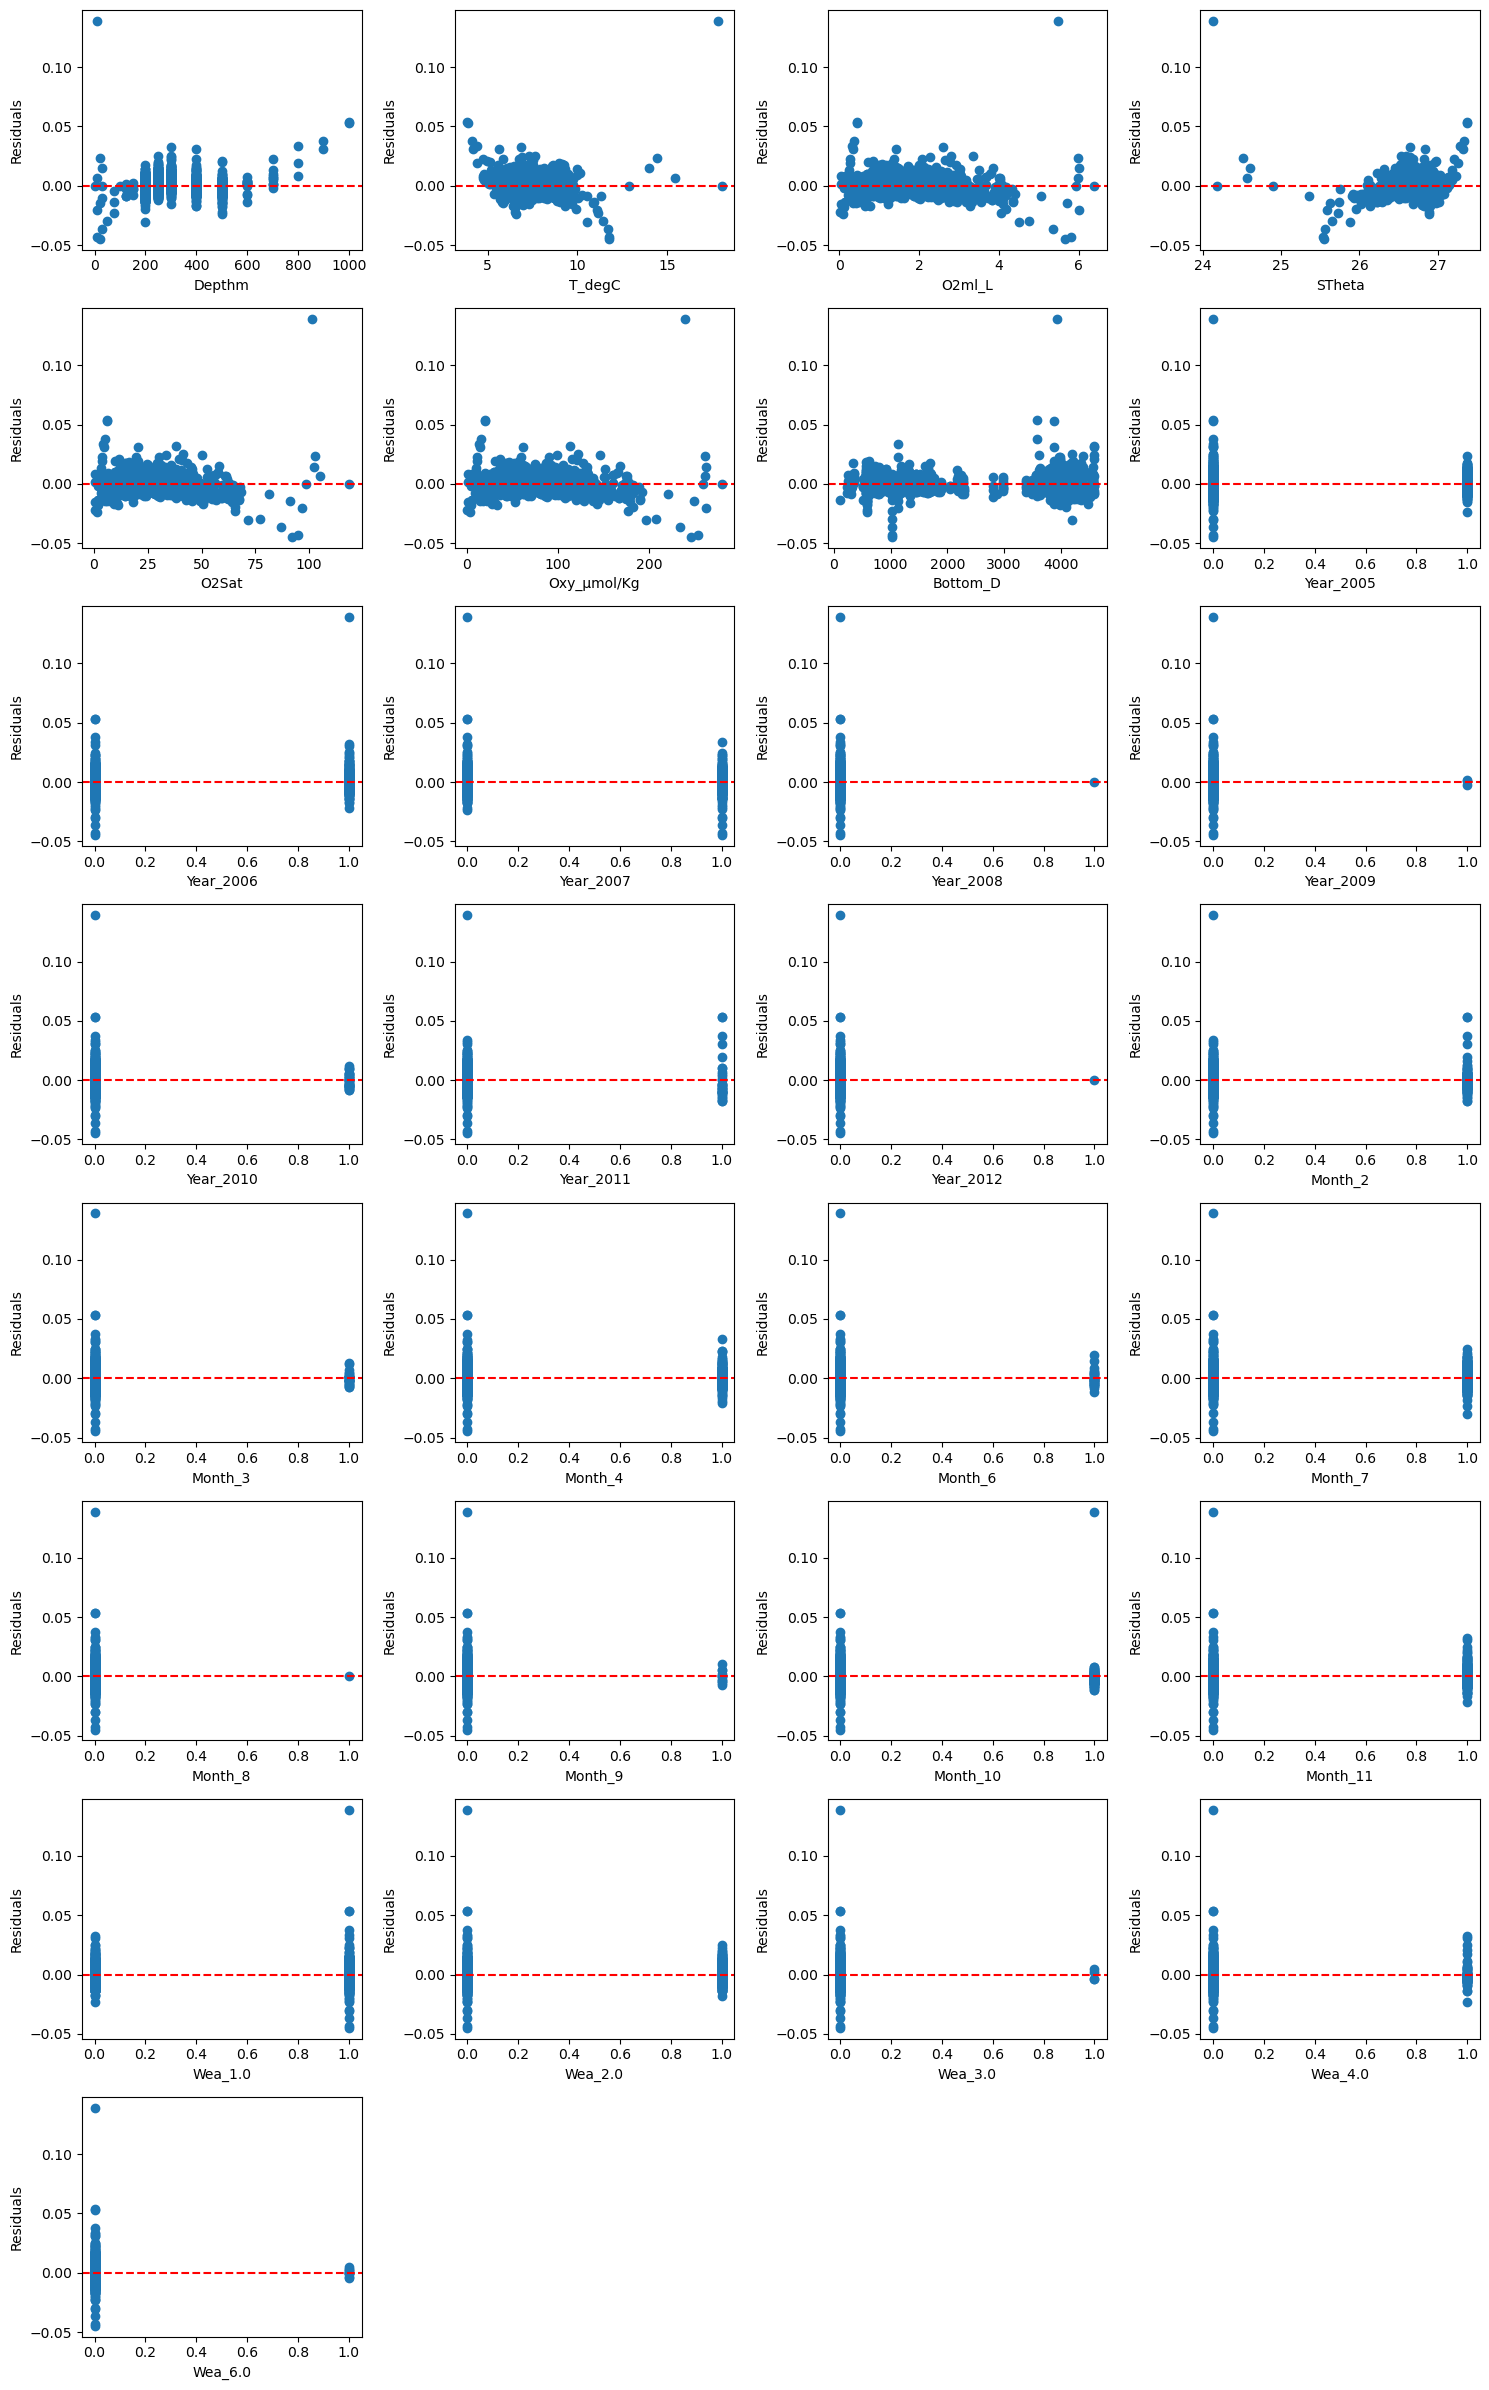

In [96]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd


residuals = model.resid


predictors = x  # Use all the predictor variables


num_predictors = len(predictors.columns)
num_cols = 4  # You can adjust the number of columns based on your preference
num_rows = (num_predictors + num_cols - 1) // num_cols


fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))


for i, col in enumerate(predictors.columns):
    ax = axes.flatten()[i]
    ax.scatter(predictors[col], residuals)
    ax.set_xlabel(col)
    ax.set_ylabel('Residuals')
    ax.axhline(0, color='red', linestyle='--')


for j in range(num_predictors, num_cols * num_rows):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()


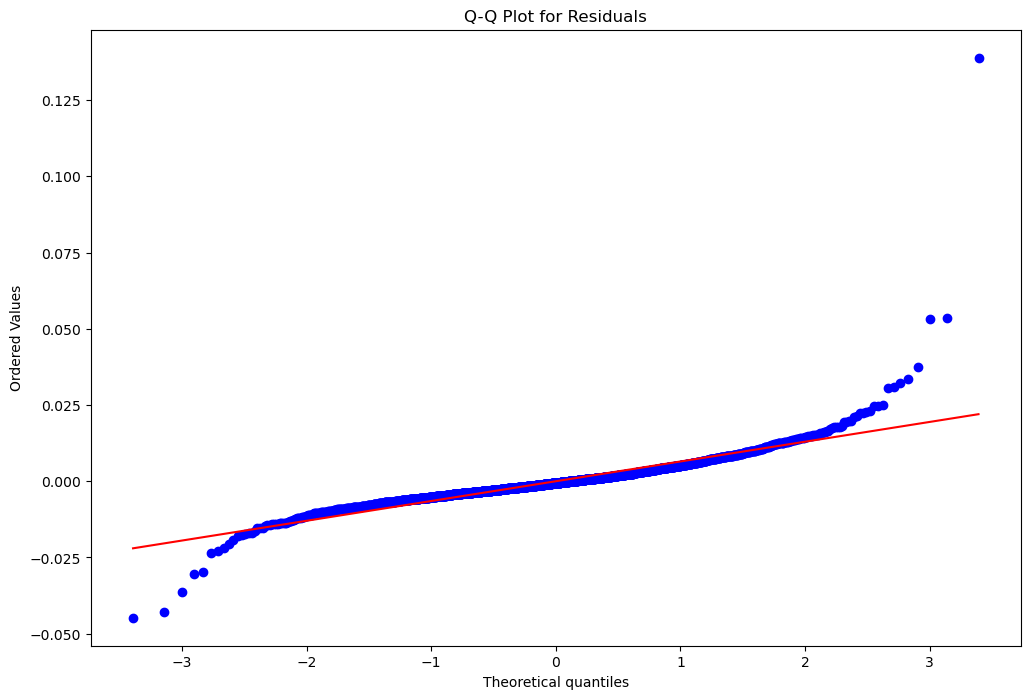

In [97]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns

residuals = model.resid

# Combine residuals for all predictor columns
std_resid = residuals 

# Q-Q plot
plt.figure(figsize=(12, 8))
probplot(std_resid, plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()


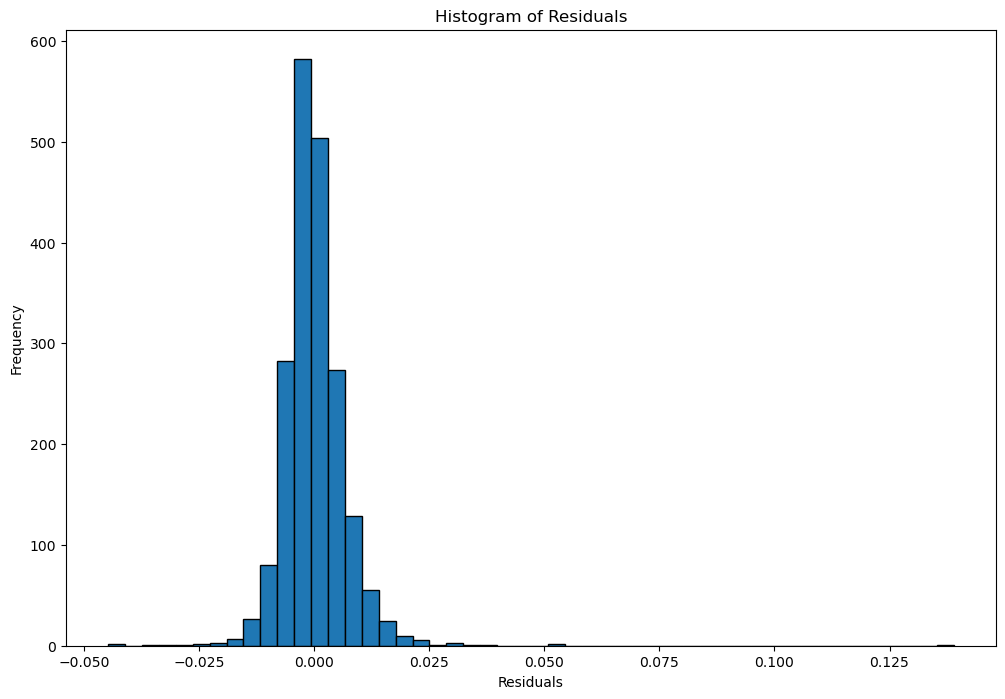

In [98]:
import matplotlib.pyplot as plt


residuals = model.resid


plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [99]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

# Add a constant term to the predictor matrix
x_train = sm.add_constant(x_train)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

# Display VIF values
print("VIF values:")
print(vif_data)

VIF values:
       Variable           VIF
0         const  1.332753e+06
1        Depthm  1.324315e+01
2        T_degC  5.567321e+01
3        O2ml_L  1.094879e+08
4        STheta  1.166979e+02
5         O2Sat  1.799254e+04
6   Oxy_µmol/Kg  1.121222e+08
7      Bottom_D  2.046182e+00
8     Year_2005  3.319153e+00
9     Year_2006  3.980425e+00
10    Year_2007  3.441384e+00
11    Year_2008  1.020400e+00
12    Year_2009  1.087228e+00
13    Year_2010  2.042874e+00
14    Year_2011  1.465032e+00
15    Year_2012  2.630113e+00
16      Month_2  2.346408e+00
17      Month_3  1.192128e+00
18      Month_4  2.216438e+00
19      Month_6  1.157225e+00
20      Month_7  2.686720e+00
21      Month_8  1.312920e+00
22      Month_9  1.664546e+00
23     Month_10  1.752849e+00
24     Month_11  2.374278e+00
25      Wea_1.0  2.634940e+00
26      Wea_2.0  2.725845e+00
27      Wea_3.0  1.026677e+00
28      Wea_4.0  1.340592e+00
29      Wea_6.0  1.077144e+00


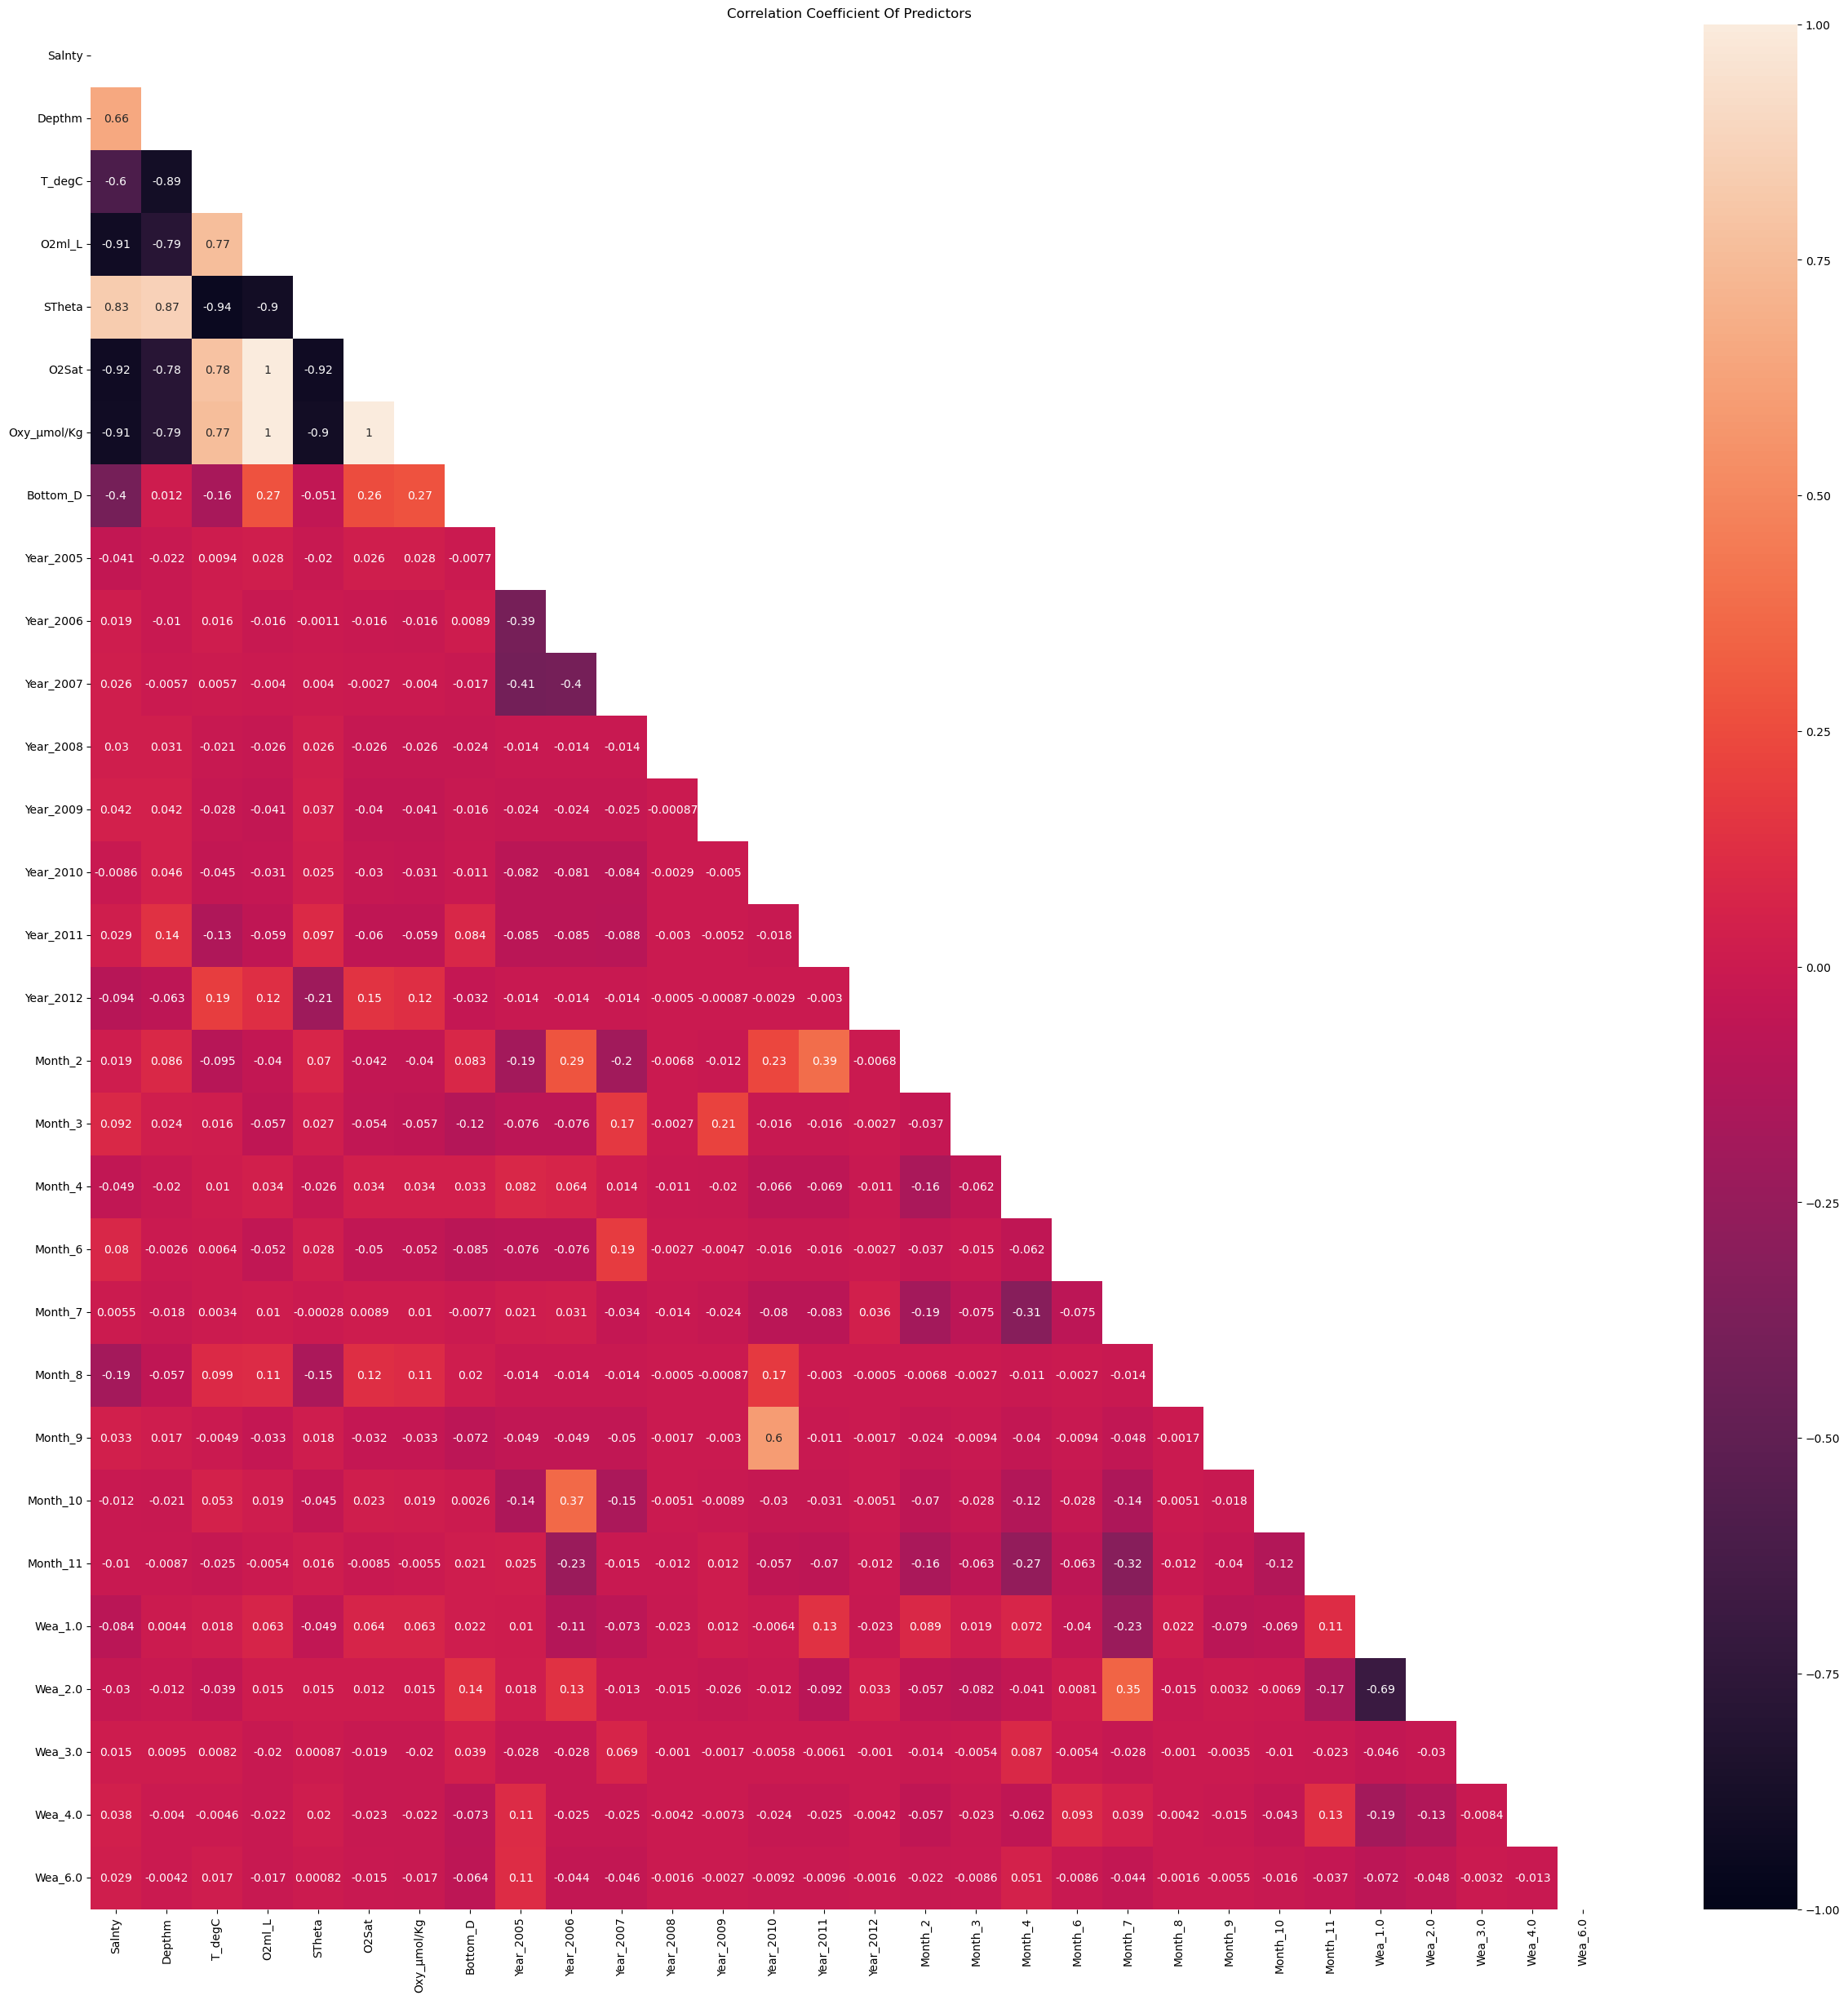

In [100]:
plt.figure(figsize=(30, 30))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(dummies.corr(), dtype=bool))

# generate heatmap
sns.heatmap(dummies.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [101]:
def compute_vif(considered_features):
    
    X = dummies[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

considered_features = ['Depthm', 'T_degC', 'O2ml_L', 'Bottom_D', 'Year_2005', 'Year_2006', 'Year_2007', 
                       'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012', 'Month_2', 'Month_3', 
                       'Month_4', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Wea_1.0', 
                       'Wea_2.0', 'Wea_3.0', 'Wea_4.0', 'Wea_6.0']
compute_vif(considered_features).sort_values('VIF', ascending=False)

/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_75554/1656234601.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
1,T_degC,7.901713
0,Depthm,6.243136
2,O2ml_L,4.364460
5,Year_2006,3.943822
6,Year_2007,3.422294
4,Year_2005,3.286442
22,Wea_2.0,2.723094
16,Month_7,2.674408
21,Wea_1.0,2.616854
12,Month_2,2.418945


In [102]:
selected_columns = ['Salnty'] + considered_features

dummies2 = dummies[selected_columns]

dummies2

,Salnty,Depthm,T_degC,O2ml_L,Bottom_D,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
765355,34.155,500,5.63,0.70,3935.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765398,34.148,200,9.25,2.08,635.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765400,34.184,250,8.72,1.75,635.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765402,34.259,300,8.50,1.20,635.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765405,34.301,400,7.81,0.70,635.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,250,8.03,1.45,1339.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817762,34.166,300,7.58,1.12,1339.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817765,34.191,400,6.95,0.72,1339.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817767,34.255,500,6.03,0.40,1339.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [103]:
x = dummies2.iloc[:, 1:]
y = dummies2.iloc[:, :1]

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

print('Intercept: \n', mlr.intercept_)
print('Coefficients: \n', mlr.coef_)

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [34.15135401]
Coefficients: 
 [[ 9.72628675e-05  2.61516861e-02 -1.40704563e-01 -8.02924743e-06
  -9.49850684e-03 -5.34504933e-03 -1.73209412e-03  1.15779129e-02
  -5.91990428e-04 -2.60547612e-02  2.71469442e-03 -1.28780837e-01
   4.04105708e-03  1.54820856e-02 -4.83552239e-03  1.85452093e-02
   9.48033403e-04 -5.57254240e-01  7.75308881e-03  3.15973379e-03
  -3.32297334e-03 -1.00030536e-02 -4.15209911e-03  5.17911697e-03
   6.15783428e-03  6.11785815e-03]]
                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     529.8
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:43:41   Log-Likelihood:                 3260.7
No. Observations:                2000   AIC:       

In [105]:
y_pred = mlr.predict(x_test)
x = dummies2.iloc[:, 1:]
# print(y_pred)

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(mlr.score(x, y) * 100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 87.35
Mean Absolute Error: 0.029661415389119695
Mean Square Error: 0.0022012568713127437
Root Mean Square Error: 0.04691755397836447


In [106]:
# Linear Regression Model Fitting using scikit-learn
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

# Model performance on training set
y_train_pred = mlr.predict(x_train)
train_r2 = mlr.score(x_train, y_train) * 100
train_meanAbErr = metrics.mean_absolute_error(y_train, y_train_pred)
train_meanSqErr = metrics.mean_squared_error(y_train, y_train_pred)
train_rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Set Performance:')
print('R squared: {:.2f}'.format(train_r2))
print('Mean Absolute Error:', train_meanAbErr)
print('Mean Square Error:', train_meanSqErr)
print('Root Mean Square Error:', train_rootMeanSqErr)

# Model performance on testing set
y_test_pred = mlr.predict(x_test)
test_r2 = mlr.score(x_test, y_test) * 100
test_meanAbErr = metrics.mean_absolute_error(y_test, y_test_pred)
test_meanSqErr = metrics.mean_squared_error(y_test, y_test_pred)
test_rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('\nTesting Set Performance:')
print('R squared: {:.2f}'.format(test_r2))
print('Mean Absolute Error:', test_meanAbErr)
print('Mean Square Error:', test_meanSqErr)
print('Root Mean Square Error:', test_rootMeanSqErr)


Training Set Performance:
R squared: 87.55
Mean Absolute Error: 0.02892047473765689
Mean Square Error: 0.002285206827761643
Root Mean Square Error: 0.04780383695647916

Testing Set Performance:
R squared: 86.40
Mean Absolute Error: 0.029661415389119695
Mean Square Error: 0.0022012568713127437
Root Mean Square Error: 0.04691755397836447


In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Linear Regression Model
mlr = LinearRegression()

# Perform cross-validation for R-squared
cv_r2_scores = cross_val_score(mlr, x, y, cv=10, scoring='r2')

# Perform cross-validation for Mean Squared Error (negative values)
cv_mse_scores = cross_val_score(mlr, x, y, cv=10, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_mse_scores  # Multiply by -1 to get positive MSE scores

# Print cross-validation scores
print('Cross-Validation Scores:')
print('R squared scores:', cv_r2_scores)
print('Average R squared: {:.2f}'.format(np.mean(cv_r2_scores) * 100))

print('\nMean Squared Error scores:', cv_mse_scores)
print('Average Mean Squared Error: {:.4f}'.format(np.mean(cv_mse_scores)))


Cross-Validation Scores:
R squared scores: [0.8615776  0.74939484 0.85113745 0.89024676 0.90190974 0.9060566
 0.8095215  0.87078353 0.90157066 0.77140528]
Average R squared: 85.14

Mean Squared Error scores: [0.00188895 0.0057428  0.00305789 0.00174321 0.00087254 0.00145315
 0.00459737 0.00228061 0.00161857 0.00498568]
Average Mean Squared Error: 0.0028


In [108]:
x_train_with_const = sm.add_constant(x_train)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_with_const.values, i) for i in range(x_train_with_const.shape[1])]

# Display VIF values
print("VIF values:")
print(vif_data)

VIF values:
     Variable         VIF
0       const  631.360345
1      Depthm    6.770838
2      T_degC    8.607897
3      O2ml_L    4.388822
4    Bottom_D    1.861973
5   Year_2005    3.305520
6   Year_2006    3.971490
7   Year_2007    3.428024
8   Year_2008    1.018976
9   Year_2009    1.085305
10  Year_2010    2.035917
11  Year_2011    1.463252
12  Year_2012    1.178690
13    Month_2    2.339878
14    Month_3    1.187456
15    Month_4    2.182377
16    Month_6    1.148567
17    Month_7    2.648370
18    Month_8    1.114448
19    Month_9    1.661752
20   Month_10    1.750802
21   Month_11    2.364490
22    Wea_1.0    2.613781
23    Wea_2.0    2.719144
24    Wea_3.0    1.025553
25    Wea_4.0    1.340053
26    Wea_6.0    1.075651


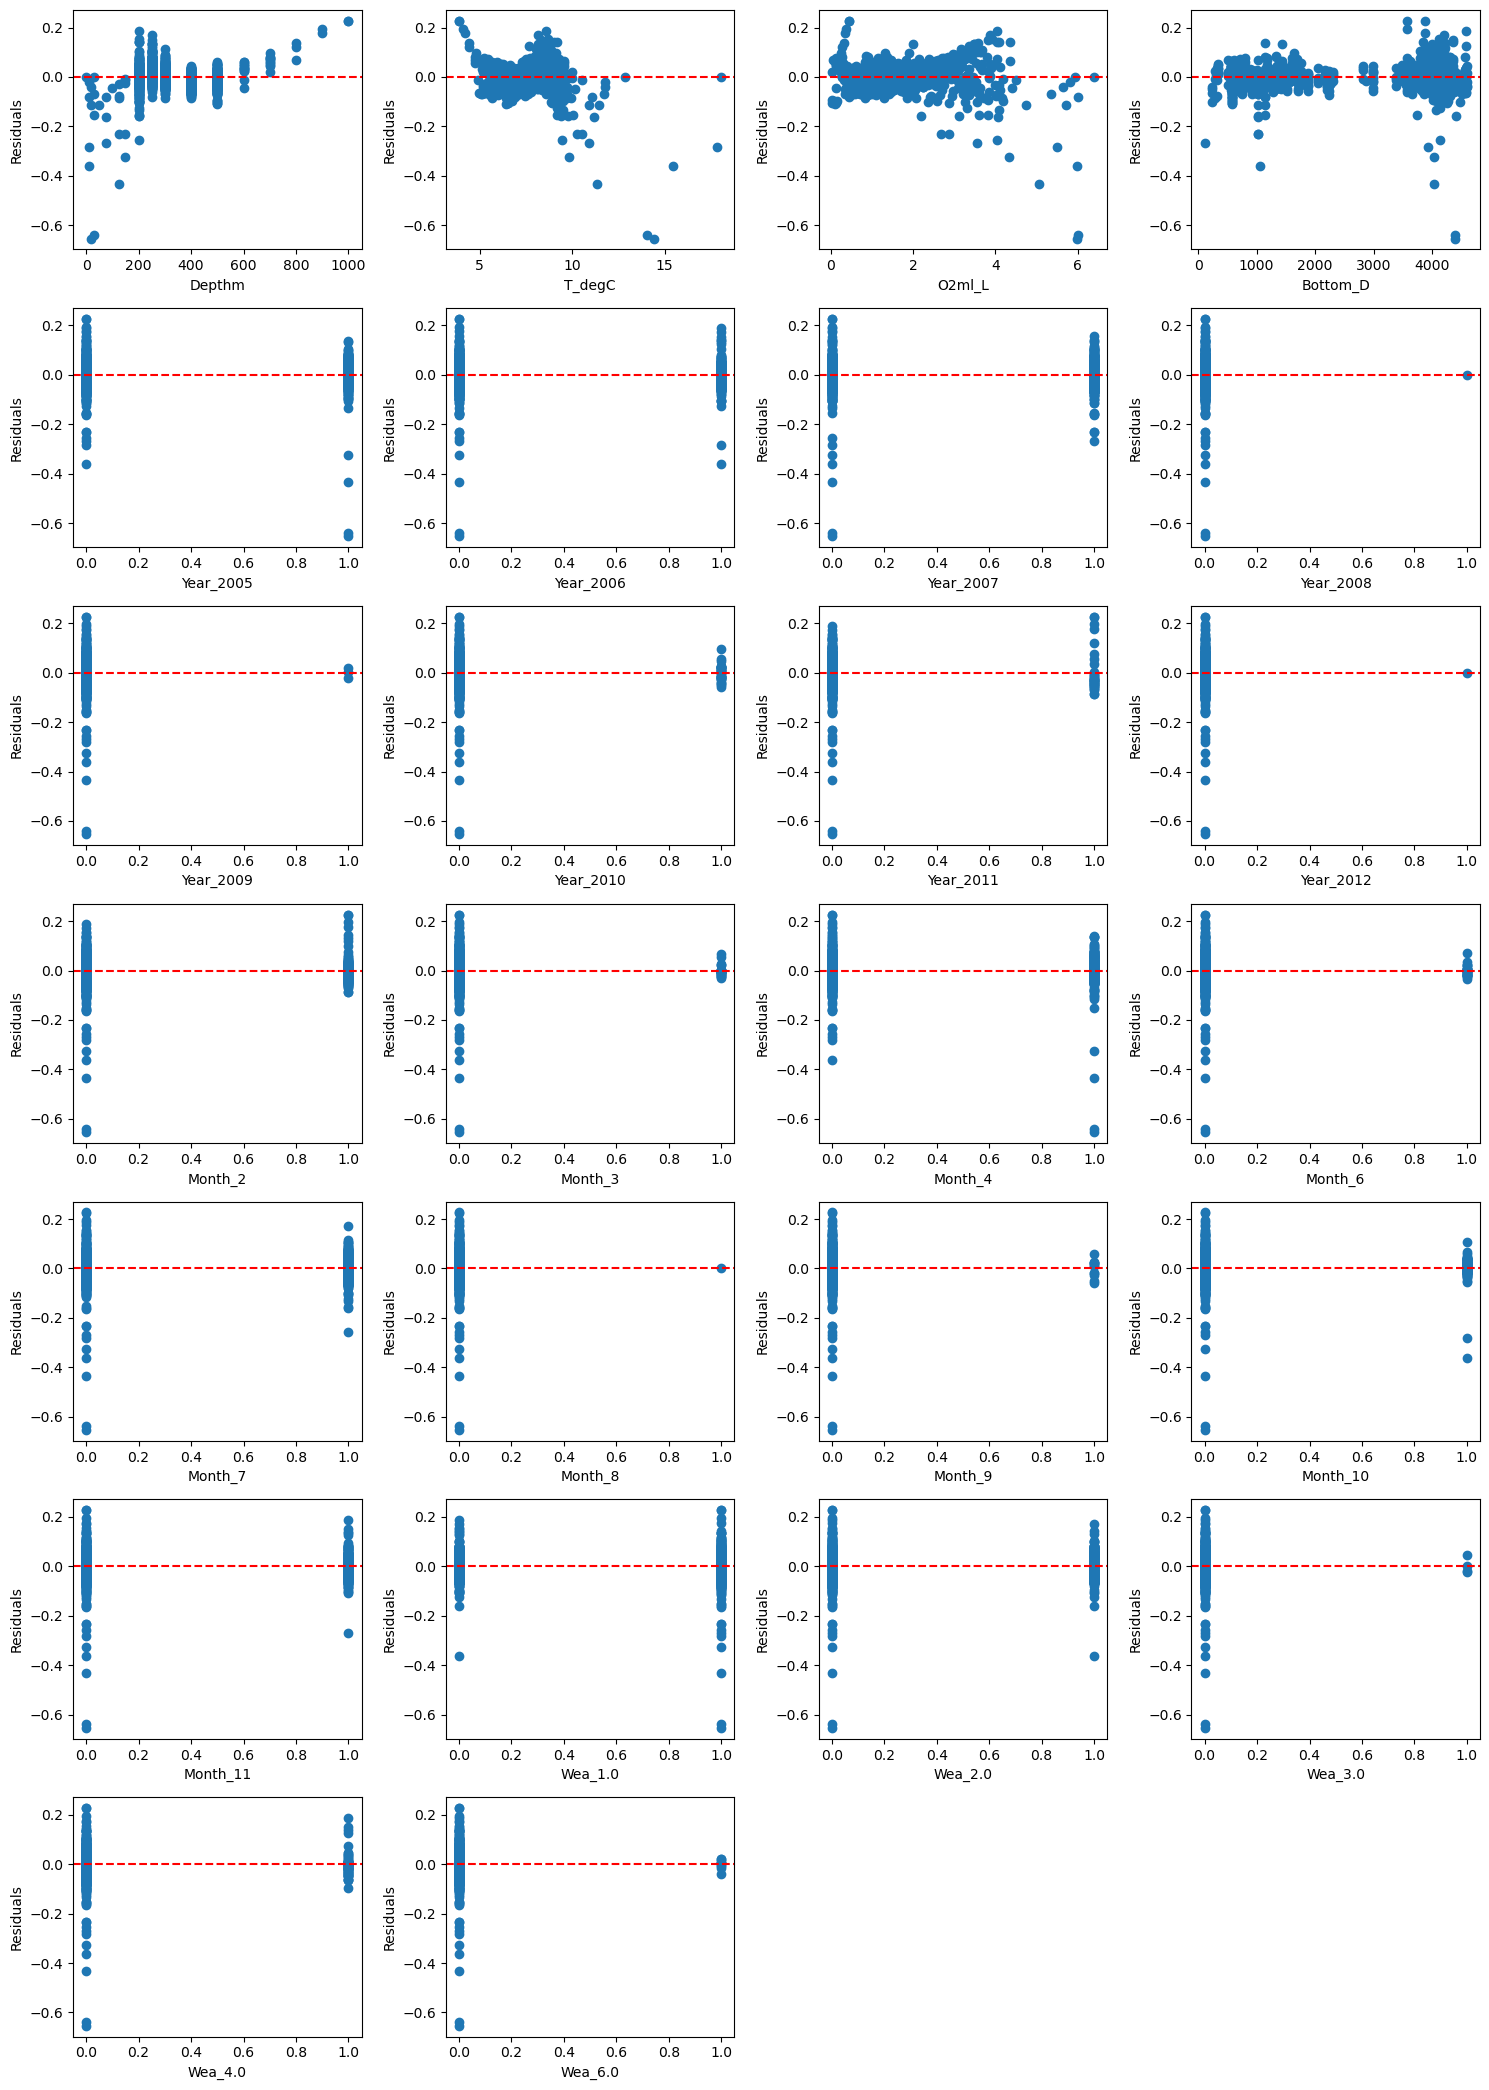

In [109]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd


residuals = model.resid


predictors = x  # Use all the predictor variables


num_predictors = len(predictors.columns)
num_cols = 4  # You can adjust the number of columns based on your preference
num_rows = (num_predictors + num_cols - 1) // num_cols


fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))


for i, col in enumerate(predictors.columns):
    ax = axes.flatten()[i]
    ax.scatter(predictors[col], residuals)
    ax.set_xlabel(col)
    ax.set_ylabel('Residuals')
    ax.axhline(0, color='red', linestyle='--')


for j in range(num_predictors, num_cols * num_rows):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()


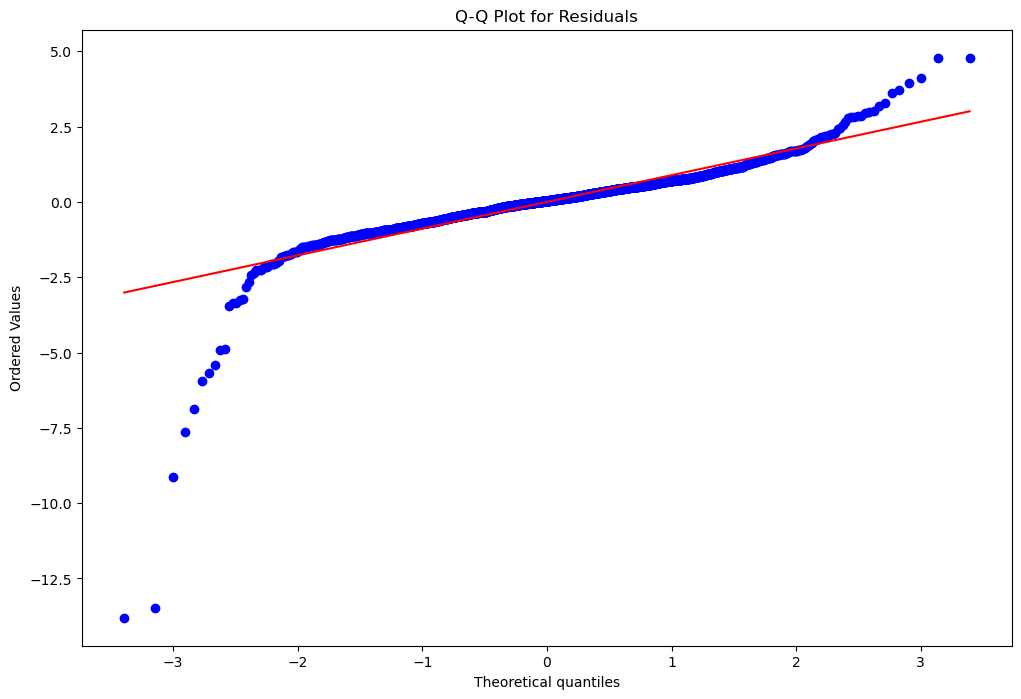

In [110]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns

residuals = model.resid

# Combine residuals for all predictor columns
std_resid = residuals / np.std(residuals)

# Q-Q plot
plt.figure(figsize=(12, 8))
probplot(std_resid, plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()


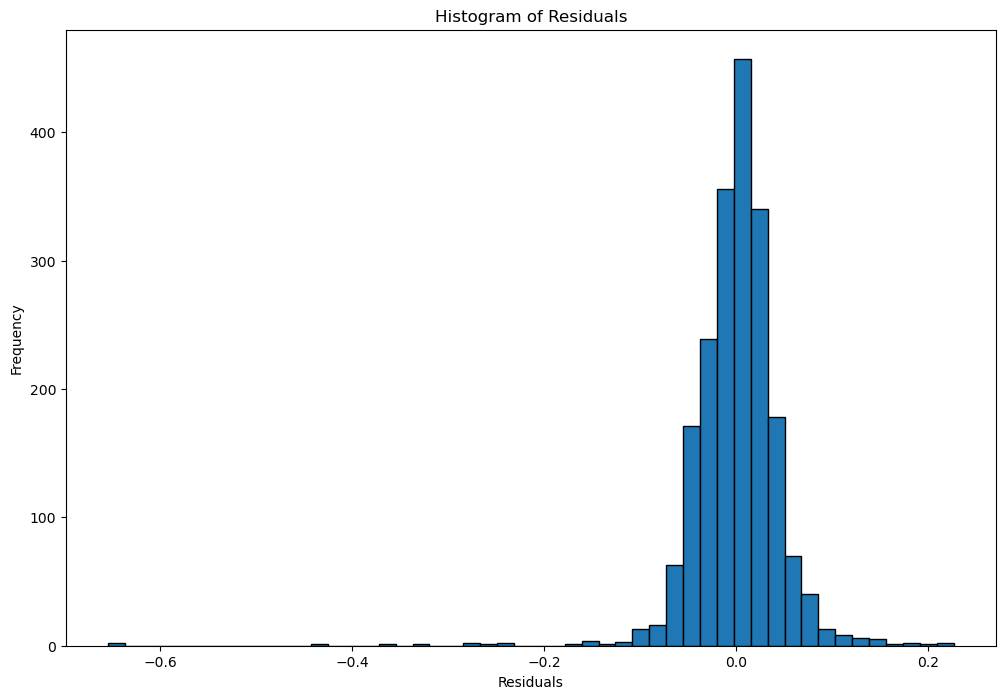

In [111]:
import matplotlib.pyplot as plt


residuals = model.resid


plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [112]:
# Drop Depthm
columns_to_drop = ['Depthm']
x_subset = x.drop(columns=columns_to_drop)

# Split the data
x_train_subset, x_test_subset, y_train_subset, y_test_subset = train_test_split(x_subset, y, test_size=0.2, random_state=100)

# Fit the linear regression model
mlr_subset = LinearRegression()
mlr_subset.fit(x_train_subset, y_train_subset)

# Print the intercept and coefficients
print('Intercept: \n', mlr_subset.intercept_)
print('Coefficients: \n', mlr_subset.coef_)

# Add a constant for statsmodels
x_subset = sm.add_constant(x_subset)

# Fit the OLS model
model_subset = sm.OLS(y, x_subset).fit()
predictions_subset = model_subset.predict(x_subset)

# Print the model summary
print_model_subset = model_subset.summary()
print(print_model_subset)


Intercept: 
 [34.24823981]
Coefficients: 
 [[ 1.82797038e-02 -1.42723925e-01 -8.60406002e-06 -9.79353414e-03
  -5.60885758e-03 -2.03466130e-03  1.41838094e-02  1.49155510e-03
  -2.62812575e-02  5.05173569e-03 -6.87058102e-02  3.31005290e-03
   1.59333642e-02 -5.63294651e-03  1.61880702e-02  7.28297172e-06
  -5.35626347e-01  6.64753853e-03  2.45325007e-03 -4.76641344e-03
  -9.71380353e-03 -4.80833770e-03  9.21174683e-03  5.39771797e-03
   6.09818585e-03]]
                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     550.1
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:43:42   Log-Likelihood:                 3259.0
No. Observations:                2000   AIC:                       

In [113]:
# Assuming you have already defined your regression model (mlr_subset) and x_test_subset, y_test_subset
# Make predictions on the test set
y_pred_subset = mlr_subset.predict(x_test_subset)

# Calculate evaluation metrics
meanAbErr_subset = metrics.mean_absolute_error(y_test_subset, y_pred_subset)
meanSqErr_subset = metrics.mean_squared_error(y_test_subset, y_pred_subset)
rootMeanSqErr_subset = np.sqrt(metrics.mean_squared_error(y_test_subset, y_pred_subset))

# Print the evaluation metrics
print('R squared: {:.2f}'.format(mlr_subset.score(x_test_subset, y_test_subset) * 100))
print('Mean Absolute Error:', meanAbErr_subset)
print('Mean Square Error:', meanSqErr_subset)
print('Root Mean Square Error:', rootMeanSqErr_subset)


R squared: 87.07
Mean Absolute Error: 0.03011960996119626
Mean Square Error: 0.002094097125745433
Root Mean Square Error: 0.045761305988197415


In [114]:

# Linear Regression Model Fitting using scikit-learn
mlr_subset = LinearRegression()  
mlr_subset.fit(x_train_subset, y_train_subset)

# Model performance on training set
y_train_pred_subset = mlr_subset.predict(x_train_subset)
train_r2_subset = mlr_subset.score(x_train_subset, y_train_subset) * 100
train_meanAbErr_subset = metrics.mean_absolute_error(y_train_subset, y_train_pred_subset)
train_meanSqErr_subset = metrics.mean_squared_error(y_train_subset, y_train_pred_subset)
train_rootMeanSqErr_subset = np.sqrt(metrics.mean_squared_error(y_train_subset, y_train_pred_subset))

print('Training Set Performance:')
print('R squared: {:.2f}'.format(train_r2_subset))
print('Mean Absolute Error:', train_meanAbErr_subset)
print('Mean Square Error:', train_meanSqErr_subset)
print('Root Mean Square Error:', train_rootMeanSqErr_subset)

# Model performance on testing set
y_test_pred_subset = mlr_subset.predict(x_test_subset)
test_r2_subset = mlr_subset.score(x_test_subset, y_test_subset) * 100
test_meanAbErr_subset = metrics.mean_absolute_error(y_test_subset, y_test_pred_subset)
test_meanSqErr_subset = metrics.mean_squared_error(y_test_subset, y_test_pred_subset)
test_rootMeanSqErr_subset = np.sqrt(metrics.mean_squared_error(y_test_subset, y_test_pred_subset))

print('\nTesting Set Performance:')
print('R squared: {:.2f}'.format(test_r2_subset))
print('Mean Absolute Error:', test_meanAbErr_subset)
print('Mean Square Error:', test_meanSqErr_subset)
print('Root Mean Square Error:', test_rootMeanSqErr_subset)


Training Set Performance:
R squared: 87.44
Mean Absolute Error: 0.02970020167609966
Mean Square Error: 0.002305433697948931
Root Mean Square Error: 0.04801493203107686

Testing Set Performance:
R squared: 87.07
Mean Absolute Error: 0.03011960996119626
Mean Square Error: 0.002094097125745433
Root Mean Square Error: 0.045761305988197415


In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Linear Regression Model
mlr_subset = LinearRegression()

# Perform cross-validation for R-squared
cv_r2_scores_subset = cross_val_score(mlr_subset, x_subset, y, cv=10, scoring='r2')

# Perform cross-validation for Mean Squared Error (negative values)
cv_mse_scores_subset = cross_val_score(mlr_subset, x_subset, y, cv=10, scoring='neg_mean_squared_error')
cv_mse_scores_subset = -cv_mse_scores_subset  # Multiply by -1 to get positive MSE scores

# Print cross-validation scores
print('Cross-Validation Scores:')
print('R squared scores:', cv_r2_scores_subset)
print('Average R squared: {:.2f}'.format(np.mean(cv_r2_scores_subset) * 100))

print('\nMean Squared Error scores:', cv_mse_scores_subset)
print('Average Mean Squared Error: {:.4f}'.format(np.mean(cv_mse_scores_subset)))


Cross-Validation Scores:
R squared scores: [0.6891667  0.77853377 0.85208575 0.88856181 0.90060287 0.90532836
 0.83503894 0.87022118 0.90057055 0.79088586]
Average R squared: 84.11

Mean Squared Error scores: [0.00424171 0.00507506 0.00303841 0.00176997 0.00088416 0.00146441
 0.00398149 0.00229053 0.00163501 0.0045608 ]
Average Mean Squared Error: 0.0029


In [116]:
x_train_with_const = sm.add_constant(x_train_subset)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_with_const.values, i) for i in range(x_train_with_const.shape[1])]

# Display VIF values
print("VIF values:")
print(vif_data)

VIF values:
     Variable         VIF
0       const  167.281778
1      T_degC    4.101754
2      O2ml_L    4.210637
3    Bottom_D    1.826452
4   Year_2005    3.304647
5   Year_2006    3.970790
6   Year_2007    3.427082
7   Year_2008    1.018766
8   Year_2009    1.084904
9   Year_2010    2.035878
10  Year_2011    1.458935
11  Year_2012    1.067243
12    Month_2    2.337837
13    Month_3    1.187313
14    Month_4    2.177184
15    Month_6    1.144675
16    Month_7    2.639659
17    Month_8    1.100003
18    Month_9    1.661452
19   Month_10    1.749561
20   Month_11    2.347627
21    Wea_1.0    2.612748
22    Wea_2.0    2.714565
23    Wea_3.0    1.024549
24    Wea_4.0    1.339088
25    Wea_6.0    1.075651


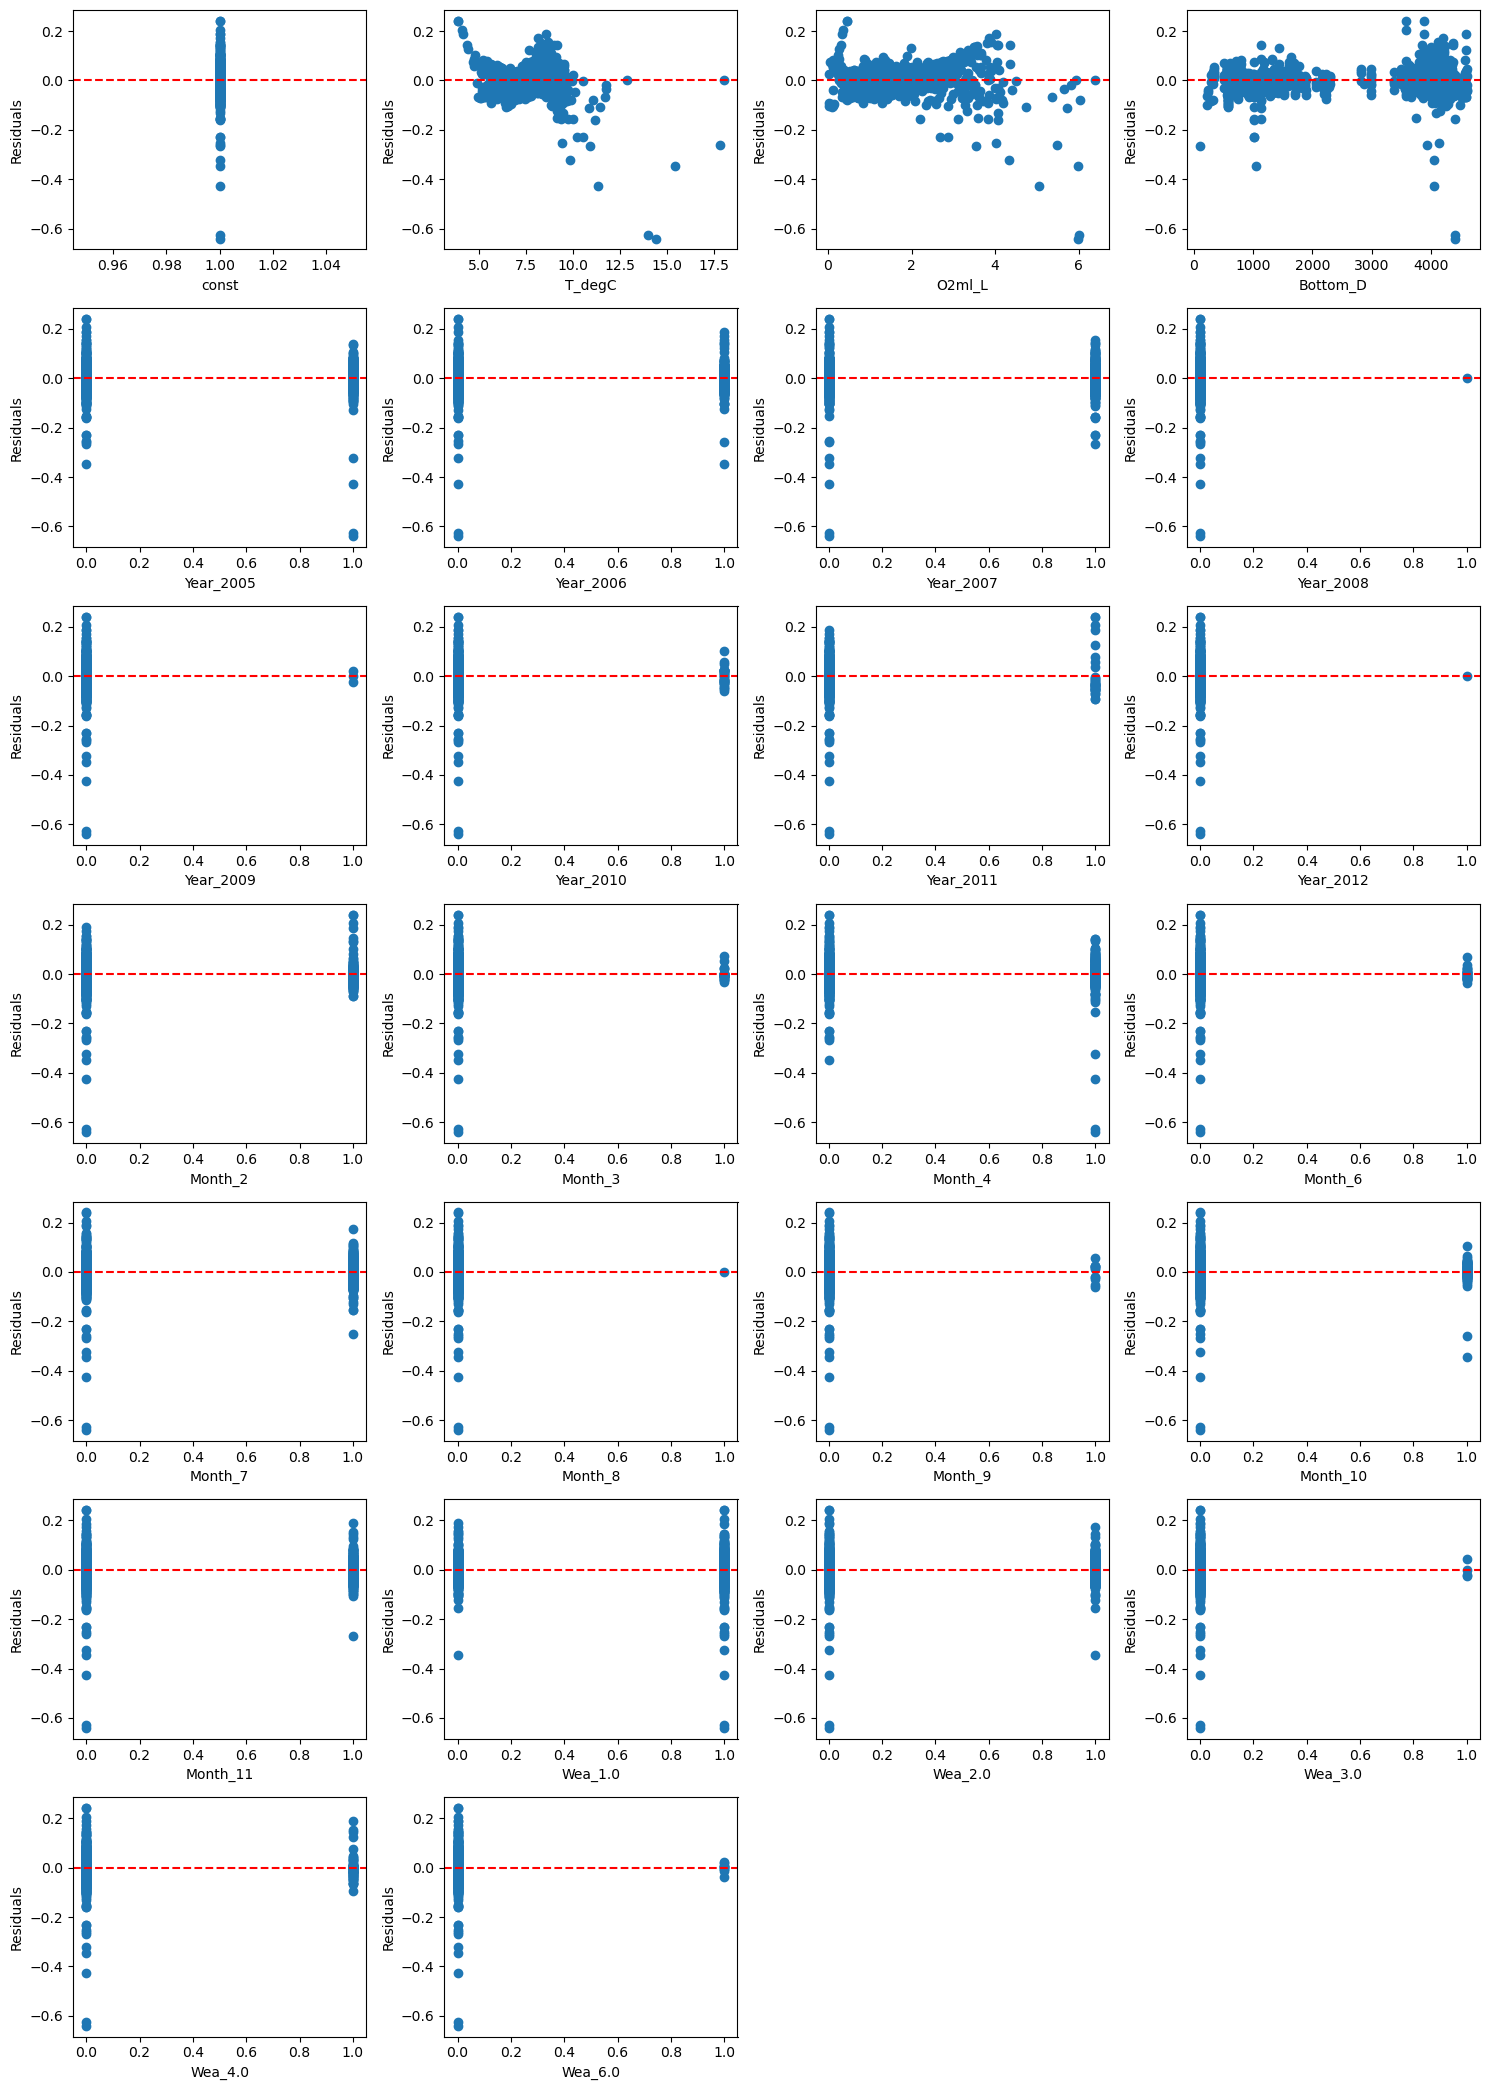

In [126]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# Assuming 'model_subset' is your model fitted on the subset data
residuals_subset = model_subset.resid

predictors_subset = x_subset  # Use the subset of predictor variables

num_predictors_subset = len(predictors_subset.columns)
num_cols_subset = 4  # You can adjust the number of columns based on your preference
num_rows_subset = (num_predictors_subset + num_cols_subset - 1) // num_cols_subset

fig_subset, axes_subset = plt.subplots(nrows=num_rows_subset, ncols=num_cols_subset, figsize=(15, 3 * num_rows_subset))

for i, col in enumerate(predictors_subset.columns):
    ax_subset = axes_subset.flatten()[i]
    ax_subset.scatter(predictors_subset[col], residuals_subset)
    ax_subset.set_xlabel(col)
    ax_subset.set_ylabel('Residuals')
    ax_subset.axhline(0, color='red', linestyle='--')

for j in range(num_predictors_subset, num_cols_subset * num_rows_subset):
    axes_subset.flatten()[j].axis('off')

plt.tight_layout()
plt.show()


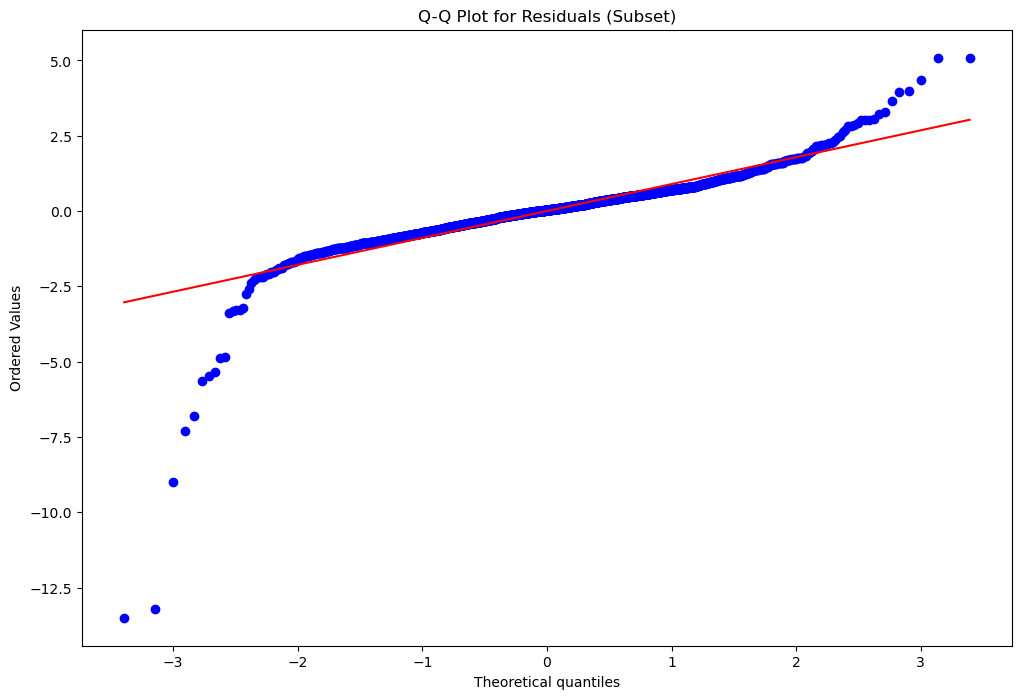

In [127]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

# Assuming 'model_subset' is your model fitted on the subset data
residuals_subset = model_subset.resid

# Combine residuals for all predictor columns
std_resid_subset = residuals_subset / np.std(residuals_subset)

# Q-Q plot
plt.figure(figsize=(12, 8))
probplot(std_resid_subset, plot=plt)
plt.title('Q-Q Plot for Residuals (Subset)')
plt.show()


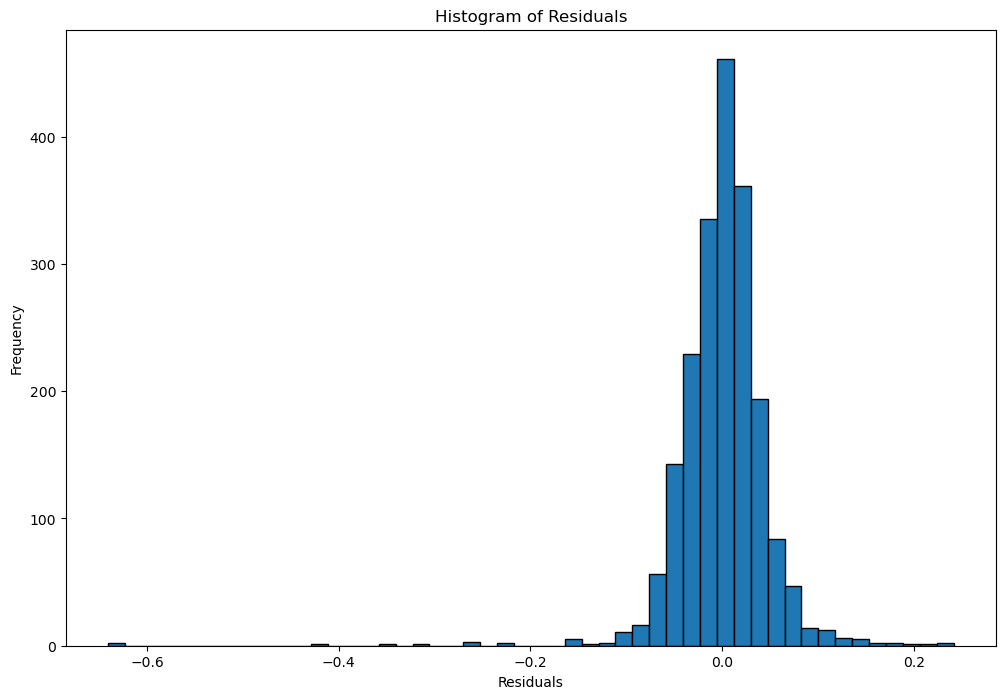

In [128]:
import matplotlib.pyplot as plt


residuals_subset = model_subset.resid

plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
